# Imports

In [3]:
# DS Basics
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

# classification - pulling in as another way to look at the data
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree

# Grahpviz 
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from pydotplus import graph_from_dot_data

## Pull in the data

In [4]:
df = pd.read_csv('creditOne_cleaned_formatted.csv', index_col=0)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df = pd.get_dummies(df)
df.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,DEFAULT_default,DEFAULT_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         30000 non-null  int64
 1   LIMIT_BAL                  30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_1                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

# Modeling

## Business problem: "The bottom line is they need a much better way to understand how much credit to allow someone to use or, at the very least, if someone should be approved or not."

In [6]:
#features
X = df.iloc[:,3:24]
print('Summary of feature sample')
X.head(2)

Summary of feature sample


,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male
0,24,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,689,0,0,0,0,1,0
1,26,-1,2,0,0,0,2,2682,1725,2682,...,3455,3261,0,1000,1000,1000,0,2000,1,0


In [7]:
# dependent variable
y=df['LIMIT_BAL']

In [8]:
model = LinearRegression(n_jobs=10)

In [9]:
print(cross_val_score(model, X, y, cv=3)) 

[0.31050506 0.33093835 0.29553982]


## Modeling Format and Model Selection

Import regression algorithms into a list so they can be run serially

In [10]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [11]:
#regression
#results = []
#names = []
#for name, model in algosClass:
#    result = cross_val_score(model, X,y, cv=3, scoring='r2')
#    names.append(name)
#    results.append(result)
#for i in range(len(names)):
#    print(names[i],results[i].mean())

X = df.iloc[:,3:24]  
Random Forest Regressor 0.4478359282537678  
Linear Regression 0.31232774134169866  
Support Vector Regression -0.0503310512284337

*Let's try with just those columns that correlated well*

In [12]:
#X= df.iloc[:,4:10]
#results = []
#names = []
#for name, model in algosClass:
#    result = cross_val_score(model, X,y, cv=3, scoring='r2')
#    names.append(name)
#    results.append(result)
#for i in range(len(names)):
#    print(names[i],results[i].mean())

X= df.iloc[:,4:10]  
Random Forest Regressor 0.10574276820435224  
Linear Regression 0.101961724682885  
Support Vector Regression -0.050732632640690355  


*definitely much worse.  It's a good idea to keep more columns in, even if it takes longer.  Let's try with them all:*

In [13]:
#X = df.iloc[:,2:30]
#results = []
#names = []
#for name, model in algosClass:
#    result = cross_val_score(model, X,y, cv=3, scoring='r2')
#    names.append(name)
#    results.append(result)
#for i in range(len(names)):
#    print(names[i],results[i].mean())

X = df.iloc[:,2:30]  
Random Forest Regressor 0.467454580873716  
Linear Regression 0.35819894266104485  
Support Vector Regression -0.05038589493310345

In [14]:
X = df.iloc[:,2:30]
X.head(2)

,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,DEFAULT_default,DEFAULT_not default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,1,0
1,2,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,1,0


### Choose the algorithm

In [31]:
algo = RandomForestRegressor(n_estimators=100,min_samples_leaf=20)
#algo = LinearRegression()

In [32]:
# ToDo: split data into train/test sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22500, 28) (7500, 28)
(22500,) (7500,)


In [33]:
model = algo.fit(X_train,y_train)

In [34]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.485
RMSE: 93578.034


Random Forest (untuned):  
R Squared: 0.476, RMSE: 94415.243  
Random Forest (tuned):  
R Squared: 0.485, RMSE: 93578.034  
Linear Regression:  
R Squared: 0.370,  RMSE: 103500.020

*These are pretty close to the cross-validation scores*



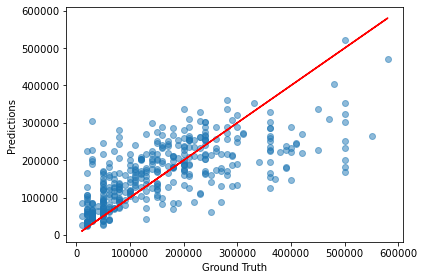

In [36]:
#plt.scatter(y_test, predictions, alpha = 0.5)
plt.scatter(y_test[0:400], predictions[0:400], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.plot(y_test[0:400],y_test[0:400], c='red')
plt.tight_layout()
plt.savefig('model_fitting.png')
plt.show();

Predictions look to run a bit high on the low end of the x-range, and run under at the high end of the x-range

*maybe consider taking a subset of the data with no defaults?*  Maybe compare RMS for defaulters vs. non-defaulters?  
**Interpreted from slack:  try binning LIMIT_BAL and turning this into a classification model like C1T2**

from Task1: **The bottom line is they need a much better way to understand how much credit to allow someone to use or, at the very least, if someone should be approved or not**  
*Idea: use classification models to look at:*  
* binned limit data
* default

## Classification Modelling - LimitBal

In [142]:
#make a copy of the dataframe to play with discretization
df2 = df.copy(deep=True)

In [143]:
df2['LIMIT_BAL'].describe()
#

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [144]:
bins = 9
limit_bin = pd.qcut(df2['LIMIT_BAL'],bins, labels=range(1, bins+1))

In [145]:
df2['limit_bin'] = limit_bin
df2['limit_bin'].head()

0    1
1    4
2    4
3    2
4    2
Name: limit_bin, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [146]:
# use the limit_bin as our dependent variable
Yclass=df2['limit_bin']
Xclass = df2.iloc[:,2:30]
Xclass.head(2)

,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,DEFAULT_default,DEFAULT_not default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,1,0
1,2,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,1,0


In [147]:
Xclass_train, Xclass_test, Yclass_train, Yclass_test = train_test_split(Xclass, 
                                                                        Yclass, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

### Select Classification Models

In [148]:
# create empty list and then populate it with the following models

models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# create empty lists to hold results and model names
results = []
names = []

### Classification Cross Validation

In [149]:
for name, model in models:
    kfold = KFold(n_splits=3, random_state=43, shuffle=True)
    result = cross_val_score(model,
                             Xclass_train,
                             Yclass_train,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.3001777777777778
RF 0.3953333333333333
GB 0.4048444444444444


Gradient Boosting Classifier appears to be the best bet

In [158]:
gb = GradientBoostingClassifier(max_depth=3, random_state=0) # , learning_rate=0.01, n_estimators=500
# train/fit the mode using amt as dv
gbModel = gb.fit(Xclass_train, Yclass_train)
# make predicitons with the trained/fit model
gbPred = gbModel.predict(Xclass_test)
# performance metrics
print(accuracy_score(Yclass_test, gbPred))
print(classification_report(Yclass_test, gbPred))

0.4132
              precision    recall  f1-score   support

           1       0.54      0.86      0.66      1033
           2       0.56      0.55      0.56       902
           3       0.45      0.43      0.44       782
           4       0.42      0.34      0.37       746
           5       0.36      0.25      0.30       795
           6       0.28      0.20      0.23       816
           7       0.27      0.25      0.26       861
           8       0.29      0.39      0.33       936
           9       0.44      0.30      0.36       629

    accuracy                           0.41      7500
   macro avg       0.40      0.40      0.39      7500
weighted avg       0.40      0.41      0.40      7500



**The binning appears to have decreased the ability to accurately model**

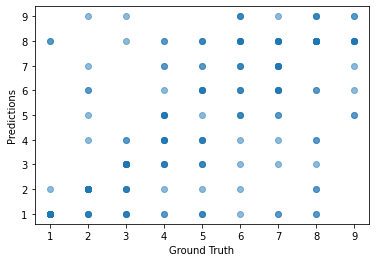

In [159]:
#plt.scatter(y_test, predictions, alpha = 0.5)
plt.scatter(Yclass_test[0:200], gbPred[0:200], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
#plt.plot(y_test[0:200],y_test[0:200], c='red')
plt.show();

We can clearly see some pretty far-off preditctions using this model.  Many points were off by a large number of bins

## Classification Modelling - Default

In [160]:
# use the limit_bin as our dependent variable
Ydef=df['DEFAULT_default']
Xdef = df.iloc[:,1:27]
Xdef.head(2)

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,0,0,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,0,0,0,0


In [161]:
Xdef_train, Xdef_test, Ydef_train, Ydef_test = train_test_split(Xdef, 
                                                                Ydef, 
                                                                test_size=0.25, 
                                                                random_state=42)

### Select Classification Models

In [162]:
# create empty list and then populate it with the following models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# create empty lists to hold results and model names
results = []
names = []

### Classification Cross Validation

In [163]:
for name, model in models:
    kfold = KFold(n_splits=3, random_state=43, shuffle=True)
    result = cross_val_score(model,
                             Xdef_train,
                             Ydef_train,   
                             cv=kfold,
                             scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

DT 0.7301333333333333
RF 0.8158222222222222
GB 0.8213333333333334


In [166]:
gb2 = GradientBoostingClassifier(max_depth=3, random_state=0) # , learning_rate=0.01, n_estimators=500
# train/fit the mode using amt as dv
gbModel2 = gb2.fit(Xdef_train, Ydef_train)
# make predicitons with the trained/fit model
gbPred2 = gbModel2.predict(Xdef_test)
# performance metrics
target_names=['not defaulted','defaulted']
print(accuracy_score(Ydef_test, gbPred2))
print(classification_report(Ydef_test, gbPred2, target_names=target_names))

0.8201333333333334
               precision    recall  f1-score   support

not defaulted       0.84      0.95      0.89      5873
    defaulted       0.66      0.36      0.46      1627

     accuracy                           0.82      7500
    macro avg       0.75      0.65      0.68      7500
 weighted avg       0.80      0.82      0.80      7500



### It's close on cross_val, let's look at a decsion tree for visualization purposes

In [168]:
dt = DecisionTreeClassifier(splitter='best',max_depth=3, min_samples_split=2) 
# train/fit the mode using region as dv, and binned by age & amt
dtModel3 = dt.fit(Xdef_train, Ydef_train)
# make predicitons with the trained/fit model
dtPred3 = dtModel3.predict(Xdef_test)
# performance metrics
print(accuracy_score(Ydef_test, dtPred3))
print(classification_report(Ydef_test, dtPred3))

0.8205333333333333
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.36      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



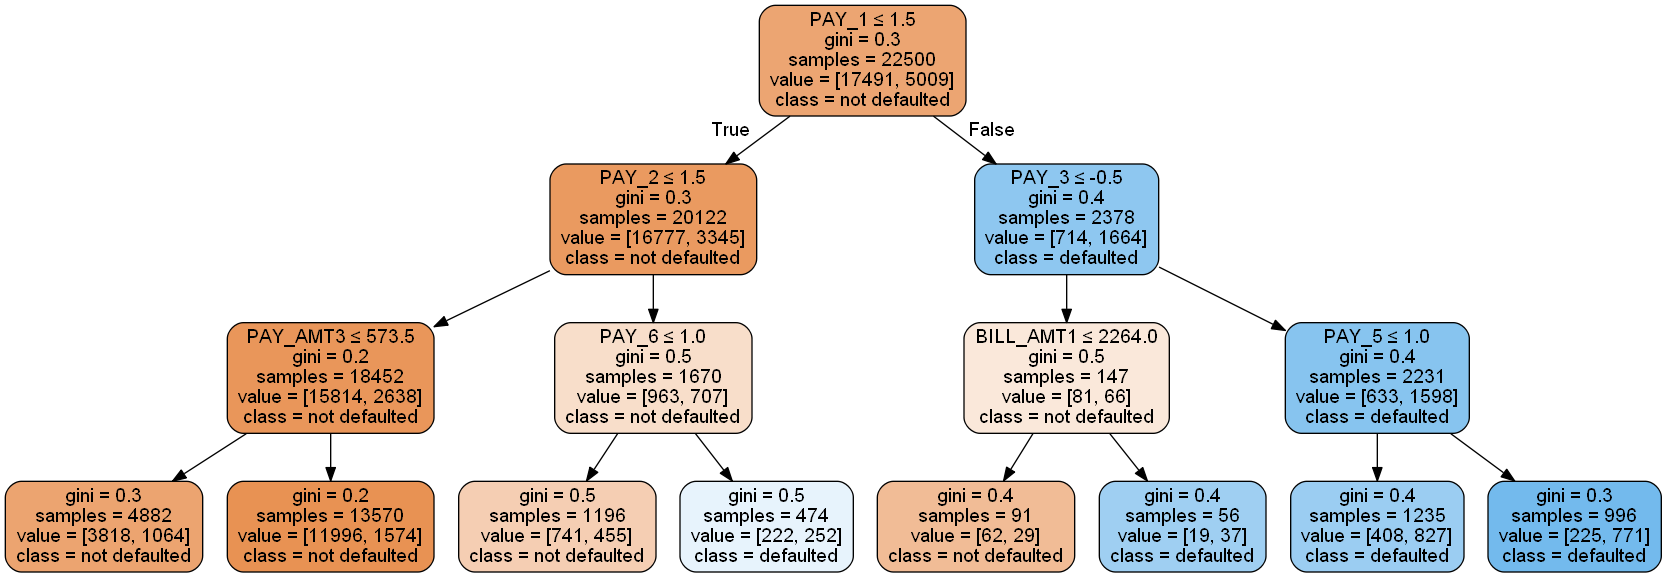

In [173]:
target_names=['not defaulted','defaulted']

dot_data = StringIO()

export_graphviz(dtModel3,
                out_file=dot_data, 
                filled=True, 
                rounded=True,
                feature_names=Xdef_train.columns, 
                class_names=target_names,
                label='all',
                precision=1,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [174]:
graph.write_png("Default_DT.png")

True